# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
ruta = "./dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

# functions

In [4]:
def distribucion_categorica(dataframe, columna):
    """
    Crea un gráfico de barras para visualizar la distribución de una variable categórica en un DataFrame
    y muestra el porcentaje de cada categoría sobre el total.

    Parámetros:
        dataframe (pd.DataFrame): DataFrame de pandas que contiene la variable categórica.
        columna (str): Nombre de la columna que se va a visualizar.

    Retorna:
        None
    """
    try:
        warnings.filterwarnings("ignore")

        # Calcular la frecuencia de cada categoría y ordenarlas de mayor a menor
        frecuencia_categorias = dataframe[columna].value_counts().sort_values(ascending=False)

        # Calcular el porcentaje de cada categoría sobre el total
        porcentaje_categorias = (frecuencia_categorias / len(dataframe)) * 100

        # Crear el gráfico de barras
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(x=frecuencia_categorias.index, y=frecuencia_categorias, palette='viridis')

        # Agregar etiquetas y título
        plt.xlabel(columna, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.title(f'Distribución de la variable categórica {columna}', fontsize=16)

        # Mostrar el porcentaje en las barras
        for i, v in enumerate(porcentaje_categorias):
            ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=12)

        # Ajustar el diseño
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Mostrar el gráfico
        plt.show()
    except Exception as e:
        print(f"Error al crear el gráfico: {e}")

In [5]:
def histograma(dataframe, columna):
    """
    Crea un histograma para visualizar la distribución de una variable numérica en un DataFrame.

    Parámetros:
        dataframe (pd.DataFrame): DataFrame de pandas que contiene la variable numérica.
        columna (str): Nombre de la columna que se va a visualizar.

    Retorna:
        None
    """
    try:
        # Crear el histograma
        sns.set_style("whitegrid")

        # Crear el histograma
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(dataframe[columna], kde=True, color='lightgreen', bins=30, alpha=0.7, edgecolor='black')
        ax.lines[0].set_color('darkgreen')

        media = dataframe[columna].mean()
        moda = dataframe[columna].mode()[0]

        # Agregar líneas verticales para la media y la moda
        plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
        #plt.text(media, plt.gca().get_ylim()[1]*0.8, f'Media', color='red', fontsize=12, ha='center')

        plt.axvline(moda, color='darkblue', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')
       # plt.text(moda, plt.gca().get_ylim()[1]*0.9, f'Moda', color='darkblue', fontsize=12, ha='center')

        #plt.text(0.02, 0.95, f'Media: {media:.2f}\nModa: {moda:.2f}', transform=plt.gca().transAxes,
              #   fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
        # Agregar etiquetas y título
        plt.xlabel(columna, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.title(f'Distribución de la variable numérica {columna}', fontsize=16)

        plt.legend()

        # Quitar bordes de la gráfica
        sns.despine()
    except Exception as e:
        print(f"Error al crear el gráfico: {e}")

In [6]:
def densidad(dataframe, variable_numerica, variable_categorica):
    """
    Crea un gráfico de densidad para visualizar cómo se comporta una variable numérica en relación con una variable categórica.

    Parámetros:
        dataframe (pd.DataFrame): DataFrame de pandas que contiene las variables numérica y categórica.
        variable_numerica (str): Nombre de la variable numérica.
        variable_categorica (str): Nombre de la variable categórica.

    Retorna:
        None
    """
    try:
        # Establecer el estilo de los gráficos
        sns.set_style("whitegrid")

        # Crear una figura y ejes para el gráfico
        plt.figure(figsize=(8, 6))

        # Iterar sobre las categorías de la variable categórica
        for categoria in dataframe[variable_categorica].unique():
            subset = dataframe[dataframe[variable_categorica] == categoria]
            sns.kdeplot(subset[variable_numerica], label=categoria, linewidth=2,
                        multiple="stack", alpha=0.65)

        # Agregar etiquetas y título
        plt.xlabel(variable_numerica, fontsize=14)
        plt.ylabel('Densidad', fontsize=14)
        plt.title(f'Distribución de {variable_numerica} por {variable_categorica}', fontsize=16)

        # Mostrar la leyenda
        plt.legend(title=variable_categorica)

        # Mostrar el gráfico
        plt.show()
    except Exception as e:
        print(f"Error al crear el gráfico: {e}")

In [7]:
def heatmap(dataframe, columna1, columna2):
    """
    Crea un heatmap para visualizar la relación entre dos variables categóricas en un DataFrame.

    Parámetros:
        dataframe (pd.DataFrame): DataFrame de pandas que contiene las dos variables categóricas.
        columna1 (str): Nombre de la primera columna categórica.
        columna2 (str): Nombre de la segunda columna categórica.

    Retorna:
        None
    """
    try:
        # Calcular la tabla de contingencia
        tabla_contingencia = pd.crosstab(dataframe[columna1], dataframe[columna2], normalize='index') * 100
        total_observaciones = pd.crosstab(dataframe[columna1], dataframe[columna2])

        # Crear el heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(tabla_contingencia, annot=False, cmap='viridis', fmt='.2f')

        # Agregar el total de observaciones en cada celda
        for i in range(len(tabla_contingencia.index)):
            for j in range(len(tabla_contingencia.columns)):
                plt.text(j + 0.5, i + 0.5, f'{total_observaciones.iloc[i, j]}\n({tabla_contingencia.iloc[i, j]:.2f}%)',
                         ha='center', va='center', color='white', fontsize=10)

        # Agregar etiquetas y título
        plt.xlabel(columna2, fontsize=14)
        plt.ylabel(columna1, fontsize=14)
        plt.title(f'Relación entre {columna1} y {columna2} (Porcentaje)', fontsize=16)

        # Mostrar el gráfico
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error al crear el gráfico: {e}")

# 1. Individual analysis

## y

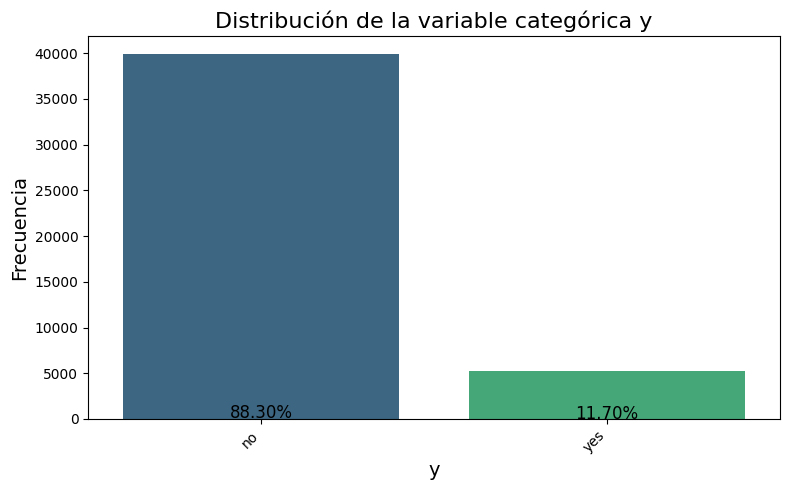

In [8]:
distribucion_categorica(data, 'y')

## job

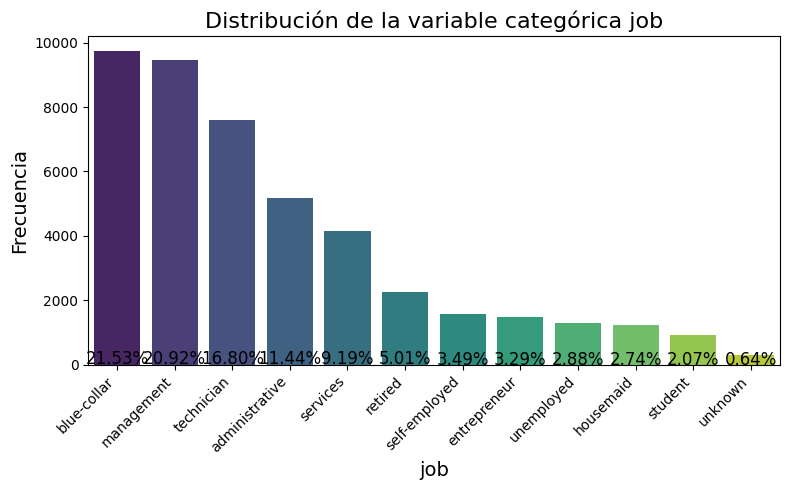

In [9]:
distribucion_categorica(data, 'job')

## marital

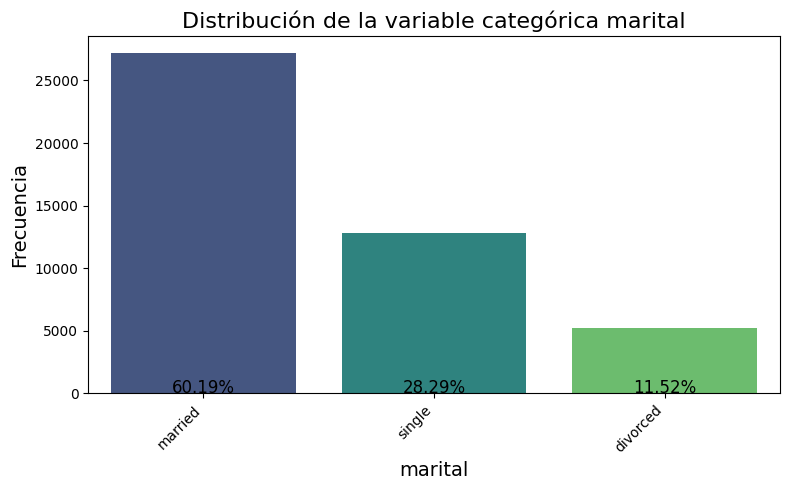

In [10]:
distribucion_categorica(data, 'marital')

##education

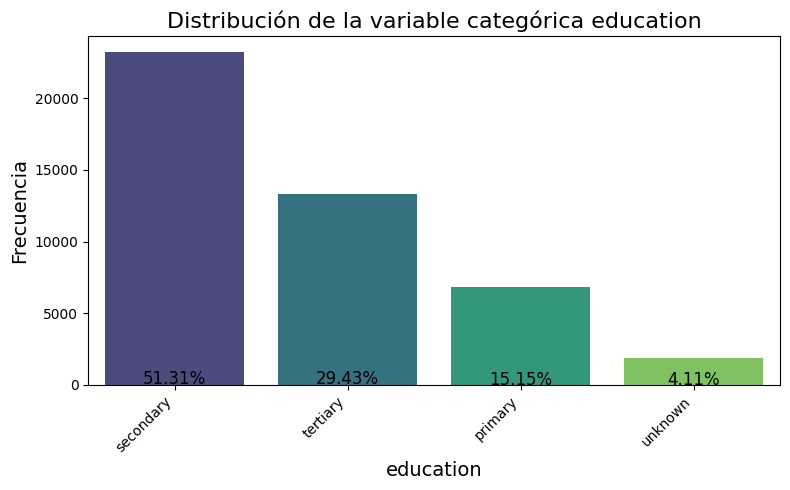

In [11]:
distribucion_categorica(data, 'education')

## default

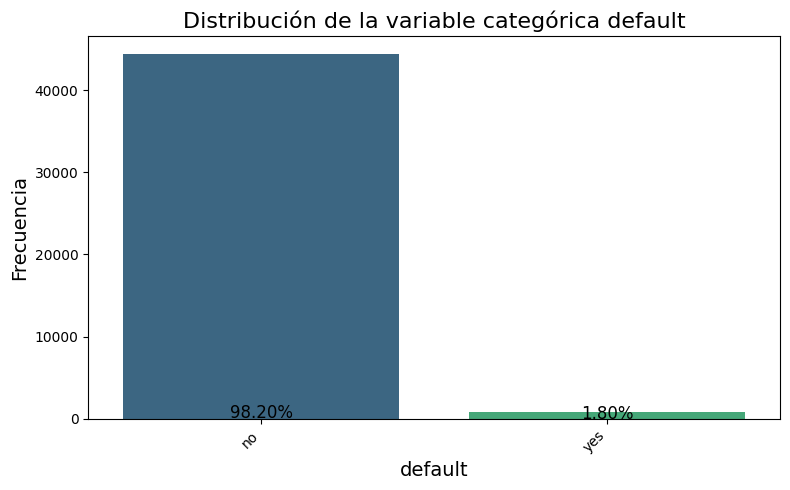

In [12]:
distribucion_categorica(data, 'default')

this variable could be deleted...

## balance

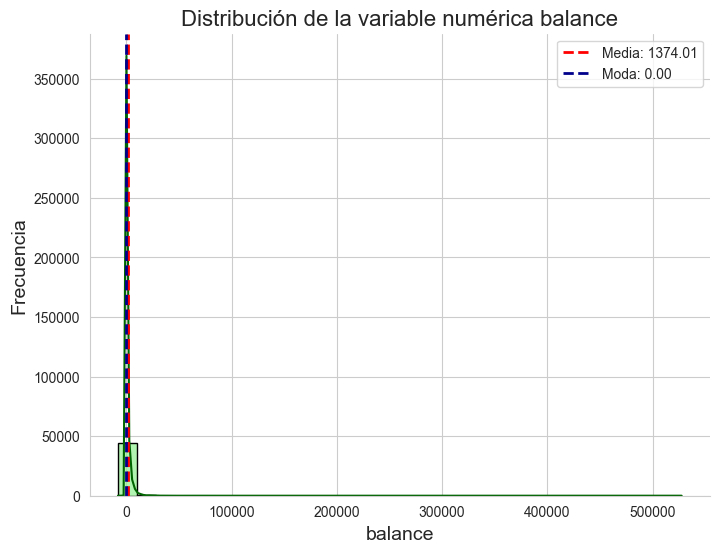

In [13]:
histograma(data, 'balance')

as you can see the 'moda' es 0.00 and the variable is not cleaned, so we will discard this variable

## housing

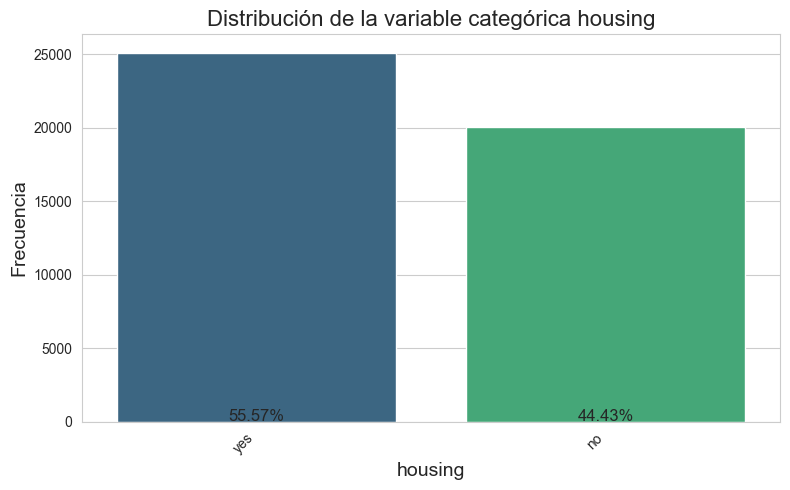

In [14]:
distribucion_categorica(data, 'housing')

## loan

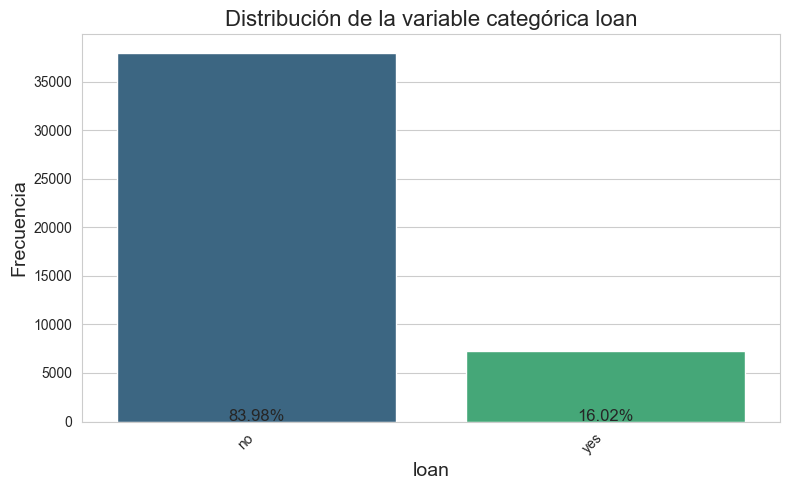

In [15]:
distribucion_categorica(data, 'loan')

## contact

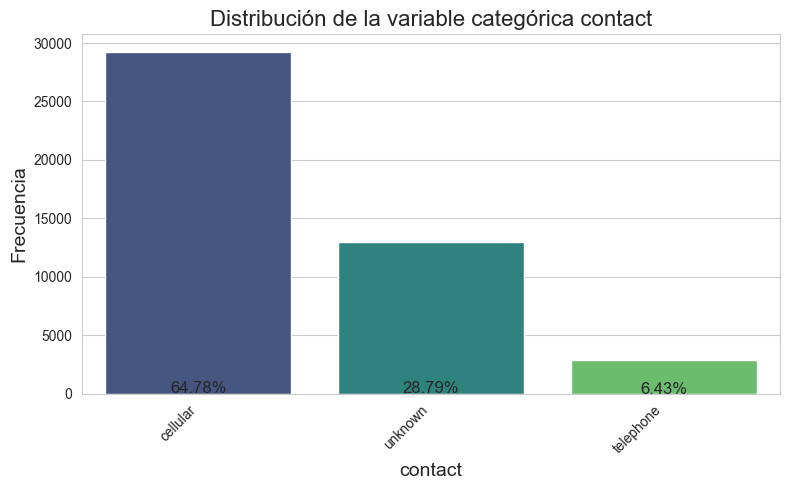

In [16]:
distribucion_categorica(data, 'contact')

this variable can be also deleted by the quantity of unkonwns

## day

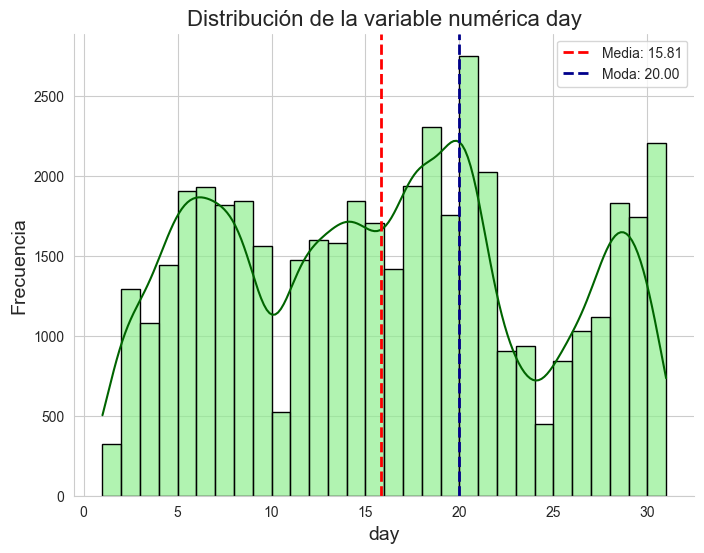

In [17]:
histograma(data, 'day')

## month

Error al crear el gráfico: Could not convert maymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaymaym

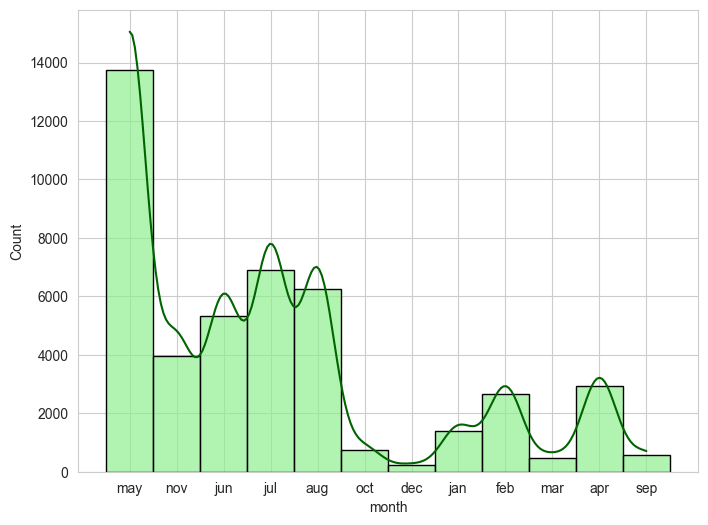

In [18]:
histograma(data, 'month')

## duration

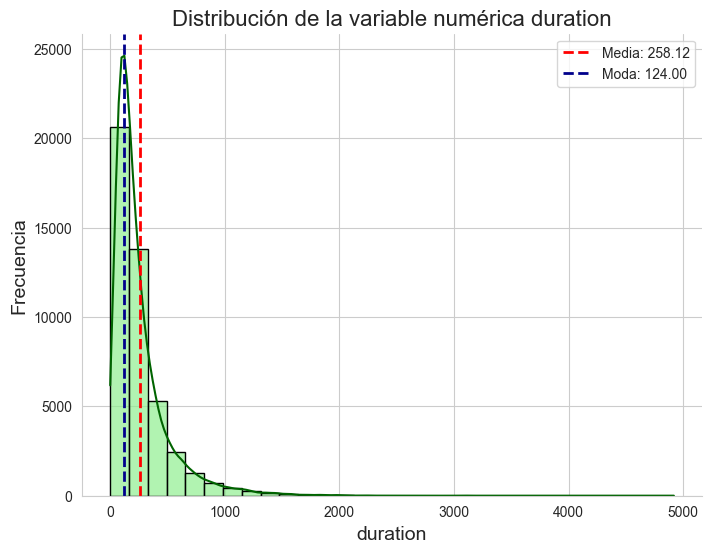

In [19]:
histograma(data, 'duration')

## campaign

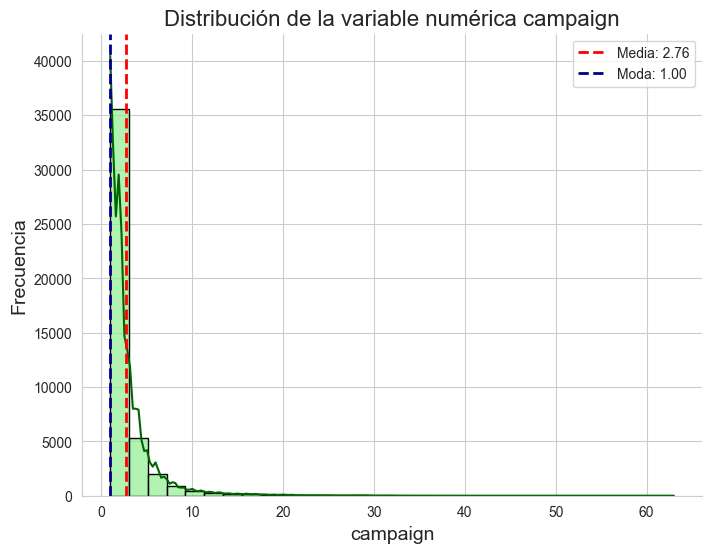

In [20]:
histograma(data, 'campaign')

## pdays

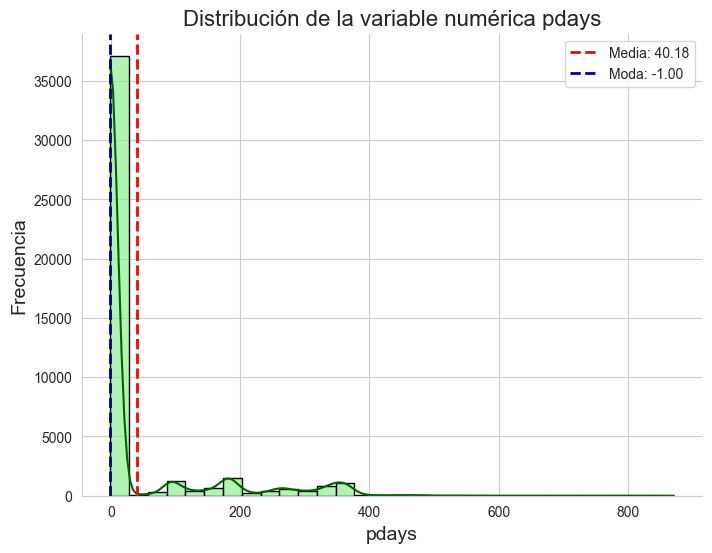

In [21]:
histograma(data, 'pdays')

its almost always -1, so we discard the variable

## previous

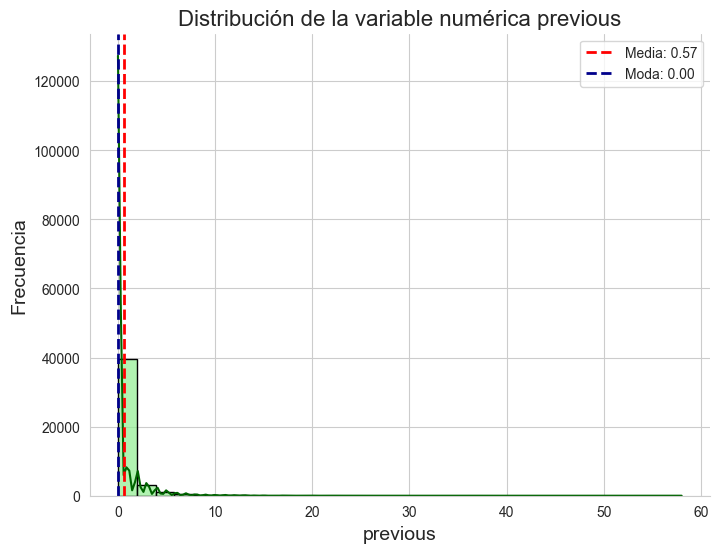

In [22]:
histograma(data, 'previous')

## poutcome

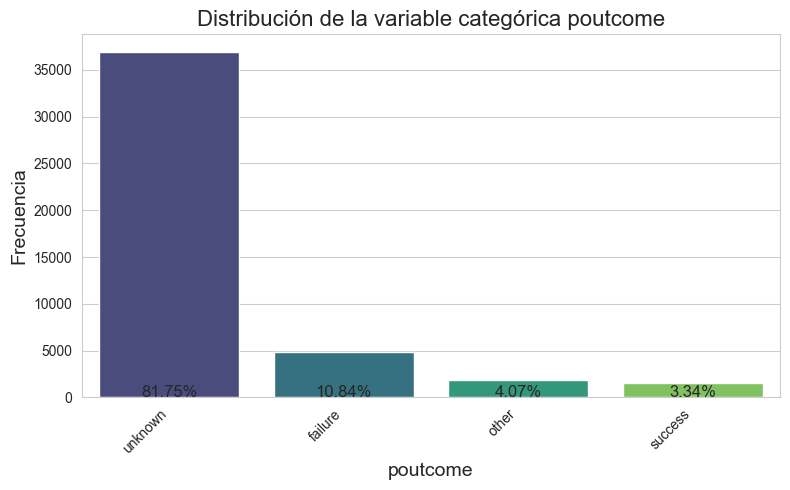

In [23]:
distribucion_categorica(data, 'poutcome')

almost alwasy unknown so discard

# correlational analysis

## y x job

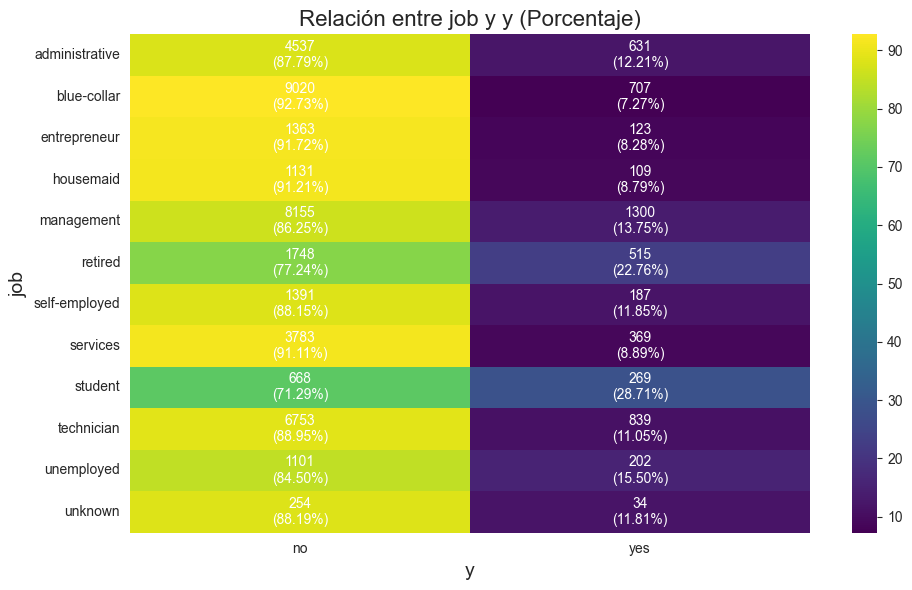

In [24]:
heatmap(data, 'job', 'y')

we can see that the categories that can have importance are retired and student, curious

## y x martial

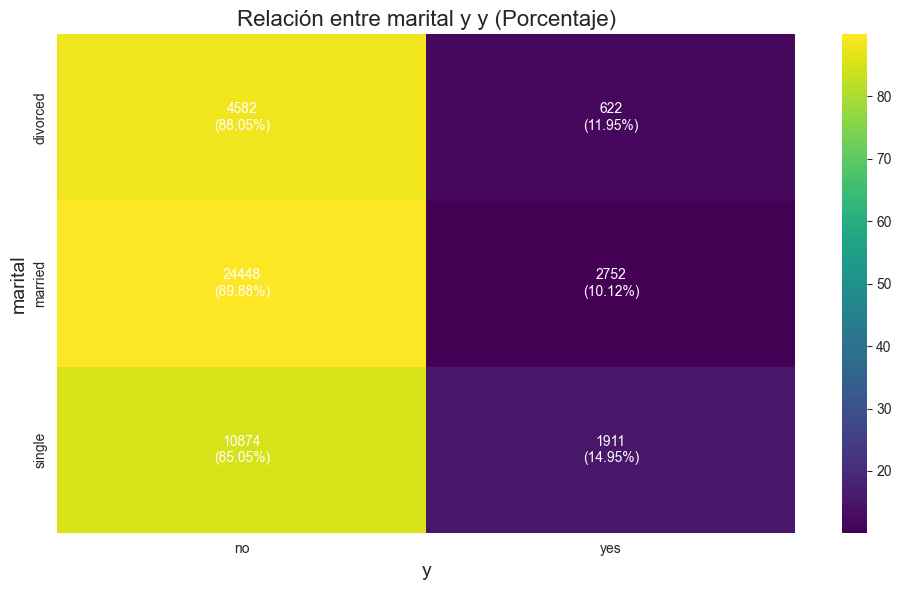

In [25]:
heatmap(data, 'marital', 'y')

not much information

## y x education

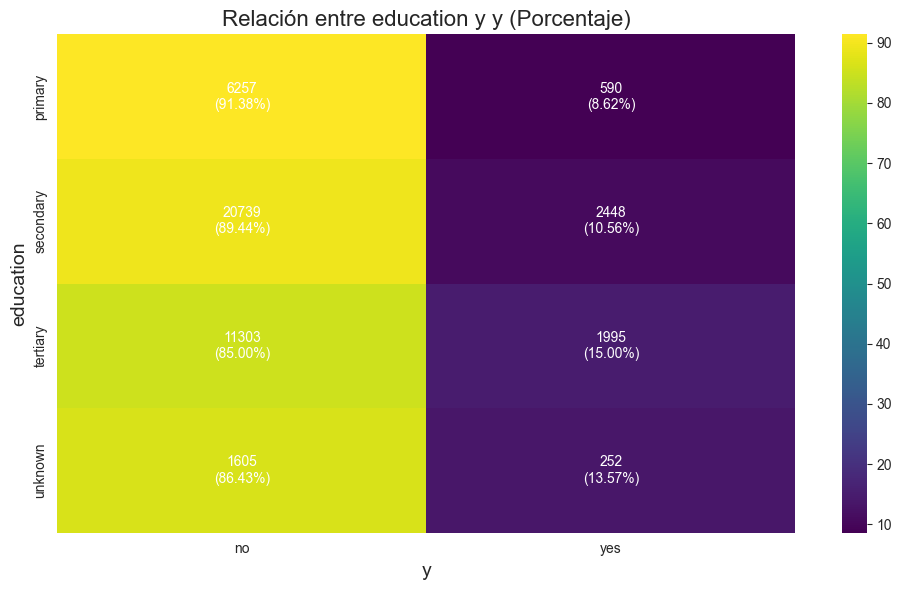

In [26]:
heatmap(data, 'education', 'y')

we can see that maybie the tertiary education can have som importance

## y x housing

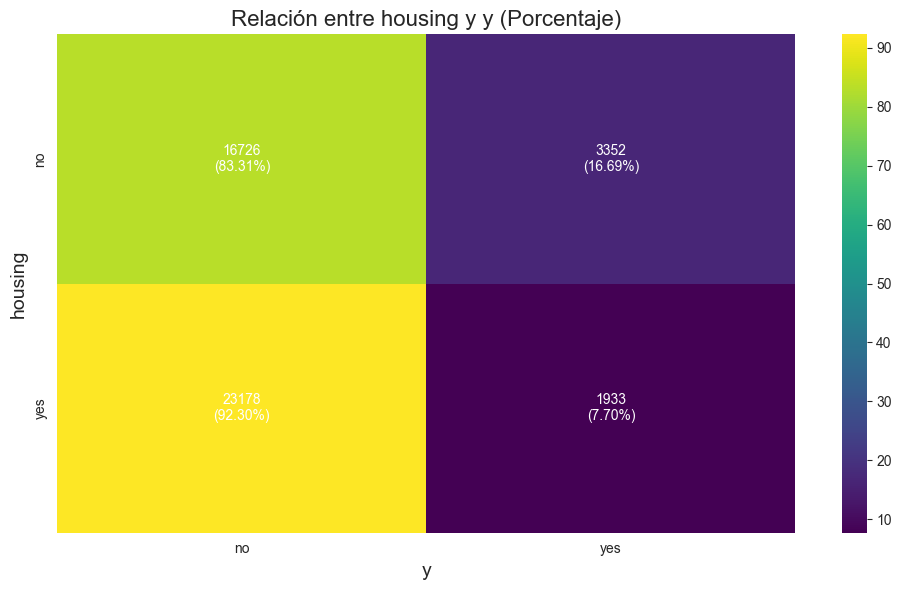

In [27]:
heatmap(data, 'housing', 'y')

this variable seems very significant.

## y x loan

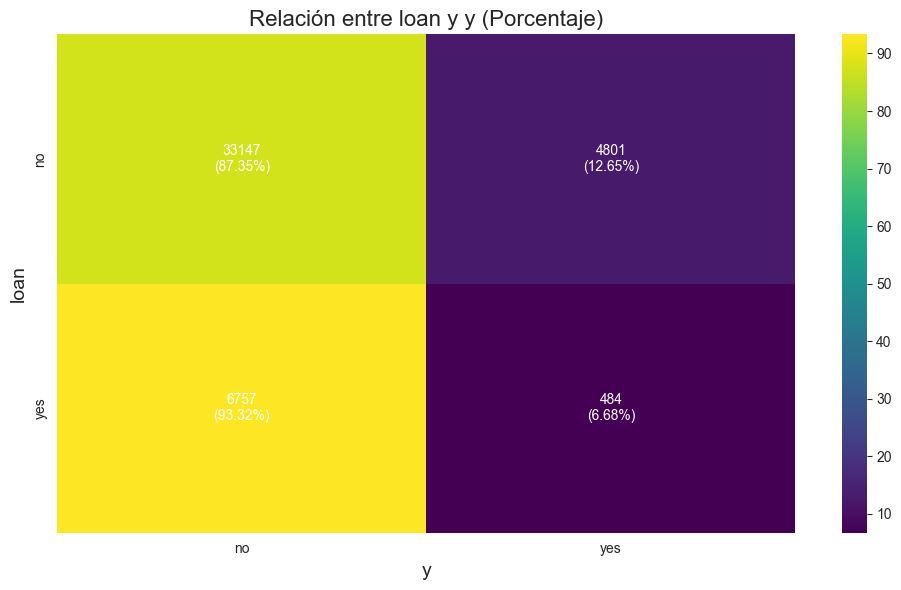

In [28]:
heatmap(data, 'loan', 'y')

this variable seems also important

## y x day

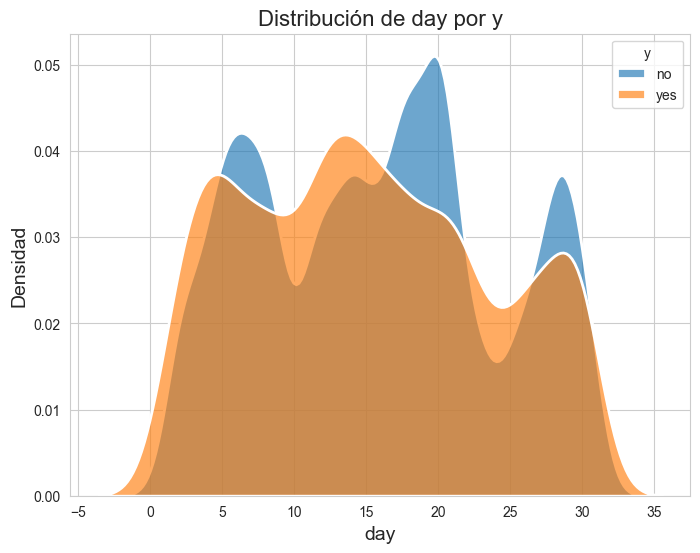

In [29]:
densidad(data, 'day' , 'y')

this variables can have importance too

## y x month

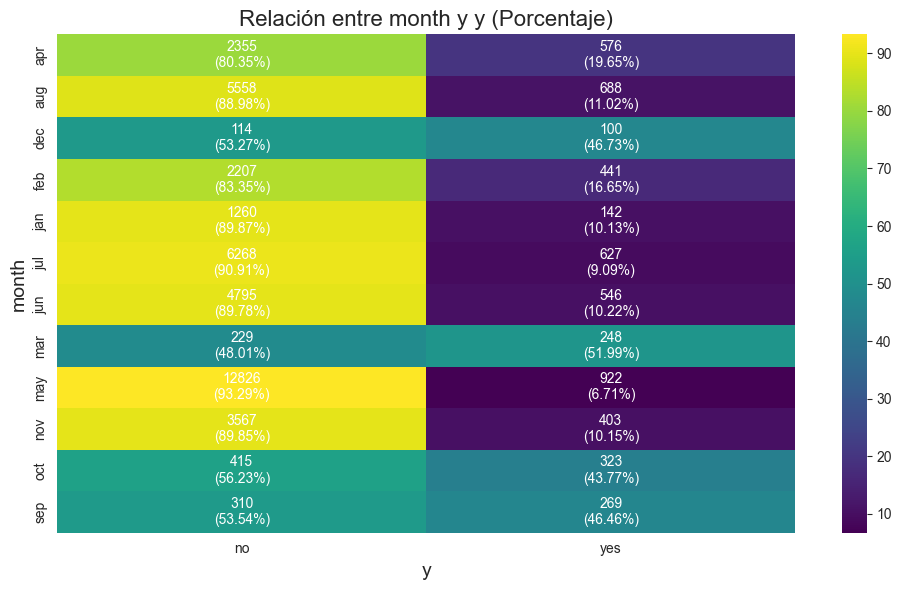

In [30]:
heatmap(data, 'month' , 'y')

this variable seems to be important too

## y x duration

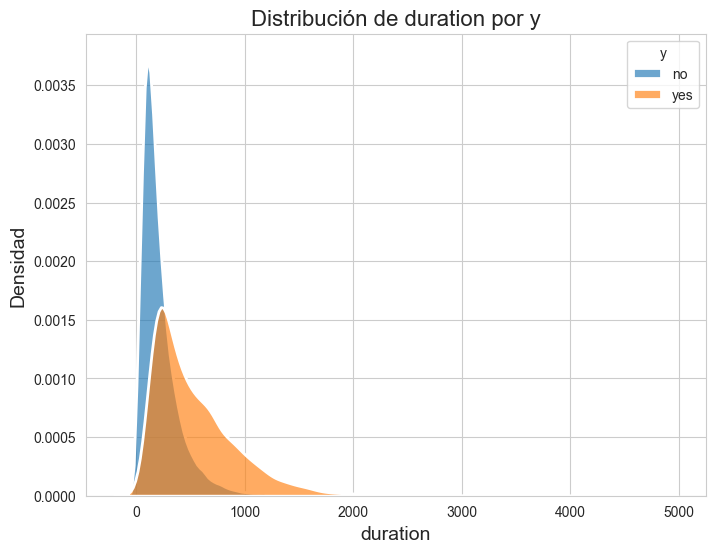

In [31]:
densidad(data, 'duration' , 'y')

## y x campaign

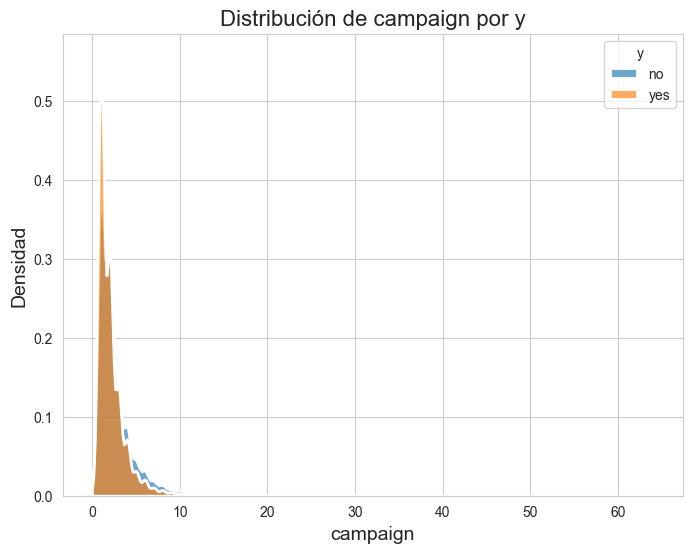

In [32]:
densidad(data, 'campaign' , 'y')

not seems to have importnace

## y x previous

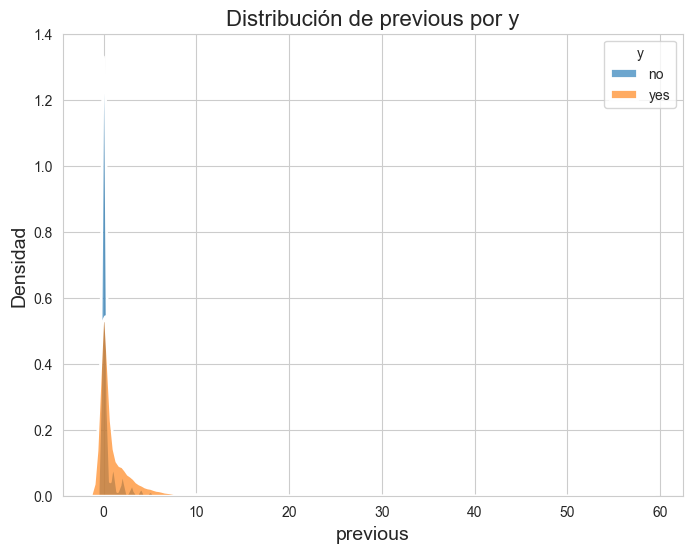

In [33]:
densidad(data, 'previous' , 'y')

# Conclusiones

after this quick analysis, we can figure that the following variables can have some importance o relation with the y variable: job, housing, loan, day, month and duration